In [1]:
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt


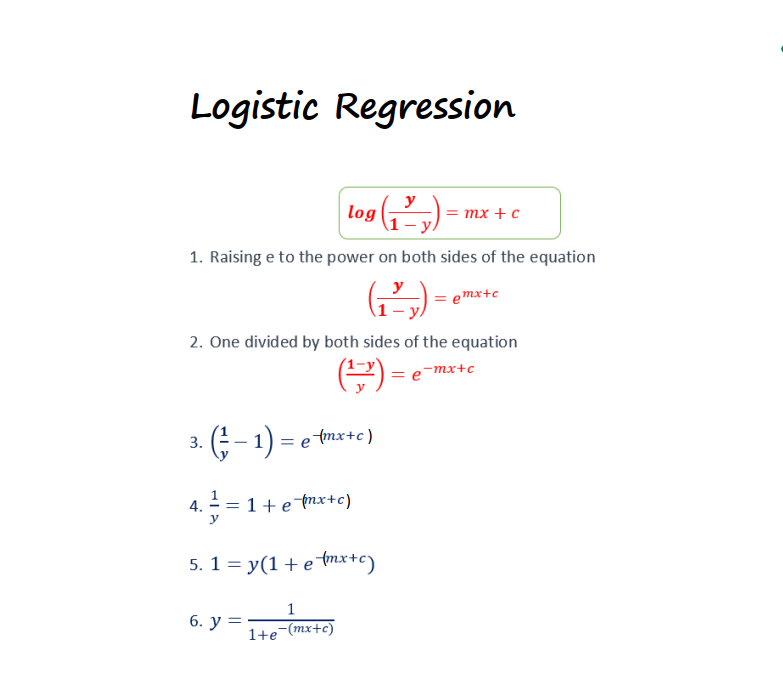

In [2]:
from IPython.display import Image
Image('logit.PNG')


In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [5]:
df1 = df.copy()

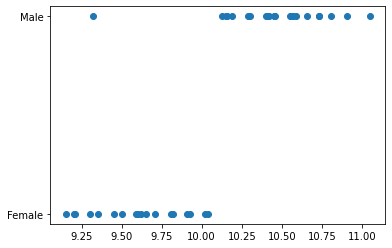

In [6]:
plt.scatter(df['size(cm)'],df['class(y)'])

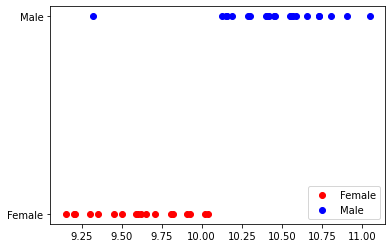

In [7]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'],color = 'red', label = 'Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color = 'blue', label = 'Male')

plt.legend()

In [8]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [9]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'],test_size=.30) 

In [12]:
xtrain.head()

,size(cm)
22,9.200
28,10.450
25,10.460
6,9.450
1,10.125


In [13]:
ytrain.head()

22    0
28    1
25    1
6     0
1     1
Name: class(y), dtype: int64

In [14]:
 from sklearn.linear_model import LogisticRegression

In [15]:
logis_reg = LogisticRegression()

In [16]:
logis_reg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
logis_reg.coef_

array([[2.19004788]])

In [18]:
logis_reg.intercept_

array([-21.64354554])

In [19]:
logis_reg.predict_proba(xtest)

array([[0.17522186, 0.82477814],
       [0.62470884, 0.37529116],
       [0.41470826, 0.58529174],
       [0.11599947, 0.88400053],
       [0.53426505, 0.46573495],
       [0.2396038 , 0.7603962 ],
       [0.81354398, 0.18645602],
       [0.13520876, 0.86479124],
       [0.33781595, 0.66218405],
       [0.13520876, 0.86479124],
       [0.47411569, 0.52588431],
       [0.83266136, 0.16733864]])

In [20]:
logis_reg.predict(xtest) #predict result

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [21]:
ytest #actual result

19    1
9     0
30    0
27    1
10    0
2     1
36    0
15    1
12    1
29    1
17    0
5     0
Name: class(y), dtype: int64

In [22]:
 logis = logis_reg.score(xtest,ytest)
logis

0.8333333333333334

# Applying KNN Classifier


In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(xtrain,ytrain)

KNeighborsClassifier()

In [24]:
knn_pred = neighbor.predict(xtest)
knn_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [25]:
ytest

19    1
9     0
30    0
27    1
10    0
2     1
36    0
15    1
12    1
29    1
17    0
5     0
Name: class(y), dtype: int64

In [26]:
knn = neighbor.score(xtest,ytest)
knn

0.9166666666666666

# Bar Graph

In [27]:
from matplotlib import pyplot as plt

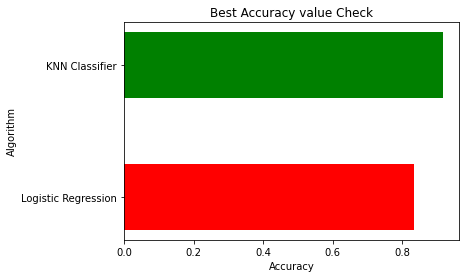

In [28]:
y = ["Logistic Regression", "KNN Classifier"]
w = [logis,knn]
c = ["red","green"]
plt.barh(y,w,0.5,color=c)
plt.title("Best Accuracy value Check")
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()

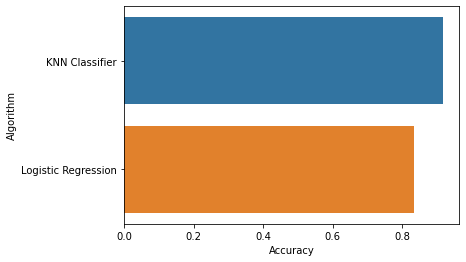

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ["KNN Classifier","Logistic Regression"]
accu = [knn,logis]
sns.barplot(x=accu, y=labels)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()